#**About Dataset:** 

Analysis of te company that reached the maximum price intraday.

Thesis: Is it worth investing in a company that has reached the maximum price intraday? Are there any grounds to invest in it?

The analyzed data changes every day as the company that has reached the maximum price changes.

We can analyze a different company every day.

Dataset is Yahoo Finance. At Yahoo Finance, we get free stock quotes, the latest news, portfolio management resources, international market data, social interaction and mortgage rates to help you manage your financial.

#Importing data

In [ ]:
!pip install yahoo-fin
!pip install requests-html

In [ ]:
!pip install yahoo_fin --upgrade

#Importing dependencies

In [ ]:
import yahoo_fin.stock_info as yh
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import time
from datetime import date, timedelta
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import io

%matplotlib inline
register_matplotlib_converters()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

#Company review


In [ ]:
response = yh.get_day_gainers()

In [ ]:
response.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,GETY,"Getty Images Holdings, Inc.",6.850,1.8000,35.59,10547000.0,573885.0,2.219000e+09,57.06
1,EGRNF,China Evergrande Group,0.083,0.0125,17.73,75092.0,86367.0,3.268000e+09,0.49
2,BESVF,BE Semiconductor Industries N.V.,50.820,7.5200,17.37,28803.0,136.0,3.765000e+09,13.03
3,AUOTY,AUO Corporation,7.170,0.7100,11.01,106042.0,68204.0,5.487000e+09,6.18
4,AACAY,AAC Technologies Holdings Inc.,1.840,0.2100,12.88,266198.0,343064.0,2.218000e+09,23.00


In [ ]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             100 non-null    object 
 1   Name               100 non-null    object 
 2   Price (Intraday)   100 non-null    float64
 3   Change             100 non-null    float64
 4   % Change           100 non-null    float64
 5   Volume             100 non-null    float64
 6   Avg Vol (3 month)  100 non-null    float64
 7   Market Cap         100 non-null    float64
 8   PE Ratio (TTM)     73 non-null     float64
dtypes: float64(7), object(2)
memory usage: 7.2+ KB


In [ ]:
response.columns

Index(['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Volume',
       'Avg Vol (3 month)', 'Market Cap', 'PE Ratio (TTM)'],
      dtype='object')

In [ ]:
response['Symbol'].unique()

array(['GETY', 'EGRNF', 'BESVF', 'AUOTY', 'AACAY', 'GOL', 'RES', 'TLRY',
       'NSP', 'FSLR', 'WYNN', 'MCARY', 'NU', 'FNMFN', 'MGYOY', 'EQT',
       'LU', 'TAL', 'ASAI', 'NTCO', 'TCNNF', 'BIREF', 'PSNY', 'EBR-B',
       'WEGZY', 'RNW', 'JAPAY', 'PETRY', 'EVKIF', 'GSAT', 'BSBR', 'GTBIF',
       'SALRY', 'CIOXY', 'CSGKF', 'AMBP', 'CSIQ', 'CLBK', 'BAK', 'NOMD',
       'TEX', 'EBR', 'LBRT', 'BBD', 'ITUB', 'CSAN', 'RUM', 'FMS', 'UBSFY',
       'ESTE', 'SWN', 'DVDCF', 'CRK', 'INSP', 'PTON', 'NPSNY', 'UGP',
       'ULCC', 'AVTR', 'NEX', 'NOVA', 'CS', 'RRC', 'GTLS', 'TKC', 'BTVCY',
       'FSR', 'KOS', 'XP', 'W', 'FREGP', 'SCHYY', 'BBDO', 'OUKPF', 'CHK',
       'DKNG', 'ASND', 'PLMR', 'HPK', 'IFS', 'AR', 'FTI', 'SHLS', 'WB',
       'DQJCY', 'TIMB', 'MHGVY', 'ABEV', 'ELP', 'AETUF', 'SBS', 'NOV',
       'UWMC', 'NWG', 'TBVPF', 'BRFS', 'ARRY', 'DCP-PC', 'BBSEY', 'SES'],
      dtype=object)

In [ ]:
response.describe()

,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,73.000000
mean,21.719644,1.269467,6.425500,6.022335e+06,3.935846e+06,9.010260e+09,33.672603
std,36.806744,2.310629,3.985319,1.383200e+07,7.815353e+06,1.067193e+10,88.185530
min,0.083000,0.012500,3.450000,1.686200e+04,6.000000e+01,1.715000e+09,0.490000
25%,5.437500,0.307500,4.507500,1.401702e+05,9.624825e+04,2.792750e+09,8.830000
50%,10.525000,0.565000,5.230000,1.131500e+06,8.255365e+05,4.968500e+09,13.030000
75%,18.835000,0.922500,7.240000,4.191750e+06,3.437750e+06,1.033400e+10,24.160000
max,223.060000,12.900000,35.590000,7.651200e+07,4.000100e+07,5.709000e+10,707.140000


**Which company has reached the maximum price today?**

In [ ]:
px.bar(data_frame=response.sort_values('Symbol'), x='Symbol', y='Price (Intraday)', title='Increases of companies on a given day',
      text_auto=True, color='Symbol', hover_data=['Name', 'Volume']) 

**I check the company that has the highest growth during the day.**

In [ ]:
max_day = response['Price (Intraday)'].max()
max_day

223.06

In [ ]:
df = response['Price (Intraday)'].idxmax()
df

63

In [ ]:
name_max_day = response.loc[df , 'Symbol']
name_max_day


'GTLS'

# EARNINGS HISTORY WITH ACTUAL / EXPECTED EPS INFORMATION

I check the history of the ernings of the company that increased the maximum price intraday whether there are grounds to invest in it.

In [ ]:
history_earnings = si.get_earnings_history(name_max_day) 
history_earnings

**To extract the company's IPO date, it will write earnings histories to DataFrame**

In [ ]:
df_history_earnings = pd.DataFrame.from_dict(history_earnings) 

In [ ]:
df_history_earnings.set_index('startdatetime') 

,ticker,companyshortname,startdatetimetype,epsestimate,epsactual,epssurprisepct,timeZoneShortName,gmtOffsetMilliSeconds,quoteType
startdatetime,,,,,,,,,
2023-10-26T12:30:00.000Z,GTLS,Chart Industries Inc,BMO,NaN,NaN,NaN,EDT,-14400000,EQUITY
2023-07-27T12:30:00.000Z,GTLS,Chart Industries Inc,BMO,NaN,NaN,NaN,EDT,-14400000,EQUITY
2023-04-27T12:30:00.000Z,GTLS,Chart Industries Inc,BMO,NaN,NaN,NaN,EDT,-14400000,EQUITY
2023-02-22T13:30:00.000Z,GTLS,Chart Industries Inc,BMO,2.06,NaN,NaN,EST,-18000000,EQUITY
2022-10-28T06:01:00.000Z,GTLS,"Chart Industries, Inc.",TAS,1.33,1.49,12.45,EDT,-14400000,EQUITY
...,...,...,...,...,...,...,...,...,...
2007-11-13T05:00:00.000Z,GTLS,"Chart Industries, Inc.",TAS,0.42,0.42,0.00,EST,-18000000,EQUITY
2007-08-13T04:00:00.000Z,GTLS,"Chart Industries, Inc.",TAS,0.34,0.51,48.26,EDT,-14400000,EQUITY
2007-05-14T04:00:00.000Z,GTLS,"Chart Industries, Inc.",TAS,0.32,0.28,-12.50,EDT,-14400000,EQUITY


**The first stock exchange listing of the company**

In [ ]:
start_day = df_history_earnings['startdatetime'].min()
start_day

'2006-11-09T05:00:00.000Z'

#HISTORY OF THE COMPANY'S EARNINGS TO THIS DAY

In [ ]:
today = date.today()
end_date = today.isoformat()
end_date

'2022-10-31'

In [ ]:
earnings_history_to_date = yh.get_data(name_max_day, start_day , end_date, index_as_date = True) 

df=pd.DataFrame(earnings_history_to_date)
df

,open,high,low,close,adjclose,volume,ticker
2006-11-09,15.000000,15.000000,13.170000,13.310000,13.310000,246800,GTLS
2006-11-10,13.280000,13.640000,13.250000,13.600000,13.600000,52600,GTLS
2006-11-13,13.750000,14.210000,13.560000,13.630000,13.630000,186900,GTLS
2006-11-14,13.610000,14.950000,13.610000,14.890000,14.890000,134700,GTLS
2006-11-15,14.970000,15.360000,14.290000,15.240000,15.240000,167200,GTLS
...,...,...,...,...,...,...,...
2022-10-24,201.440002,204.259995,198.820007,202.110001,202.110001,331800,GTLS
2022-10-25,200.979996,209.429993,200.979996,204.889999,204.889999,320600,GTLS
2022-10-26,206.479996,207.050003,201.520004,205.800003,205.800003,338700,GTLS
2022-10-27,206.000000,209.039993,202.559998,204.160004,204.160004,707900,GTLS


In [ ]:
df.tail(5)

,open,high,low,close,adjclose,volume,ticker
2022-10-24,201.440002,204.259995,198.820007,202.110001,202.110001,331800,GTLS
2022-10-25,200.979996,209.429993,200.979996,204.889999,204.889999,320600,GTLS
2022-10-26,206.479996,207.050003,201.520004,205.800003,205.800003,338700,GTLS
2022-10-27,206.000000,209.039993,202.559998,204.160004,204.160004,707900,GTLS
2022-10-28,202.000000,213.429993,186.520004,212.660004,212.660004,833800,GTLS


**The volume (turnover) represents the activity of investors within a specific time frame. Each volume unit reflects the behavior of buyers and sellers.**

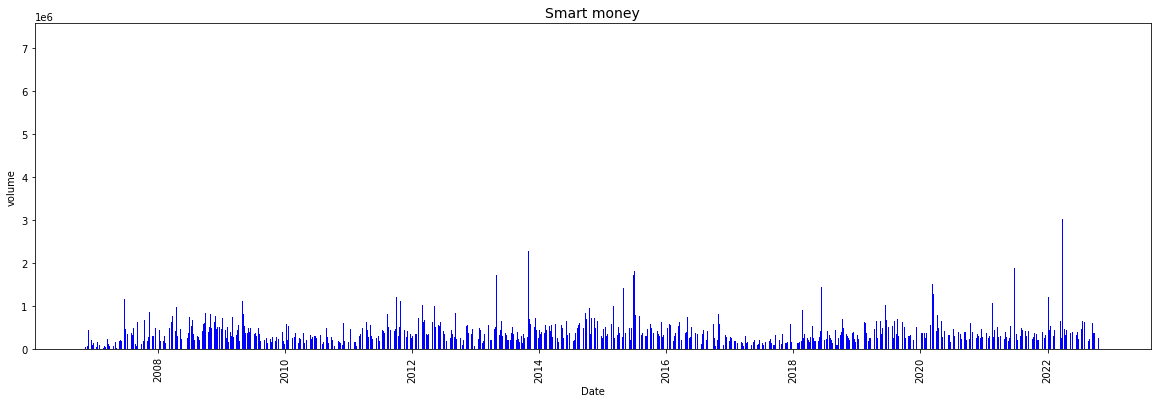

In [ ]:
fig, ax=plt.subplots(figsize=(20,6))

ax.bar(df.index, df['volume'], color='b')
ax.set_xlabel('Date')
ax.set_ylabel('volume')
ax.set_title('Smart money', fontsize=14)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

The height of the bar reflects the volume, i.e. the higher the bar, the higher the turnover. The volume analysis allows you to understand the source of the price change and find places where large capital is involved in the game. The sharp increase in volume confirms that there is a lot of capital in the game, which does not intend to sell shares at the first better correction.

**To make the chart more readable, I will illustrate the volume from the last 3 months.**

In [ ]:
three_months_ago = today - timedelta(days=90)
three_months_ago = three_months_ago.isoformat()
three_months_ago

'2022-08-02'

In [ ]:
earnings_history_three_months = yh.get_data(name_max_day, three_months_ago , end_date, index_as_date = True)

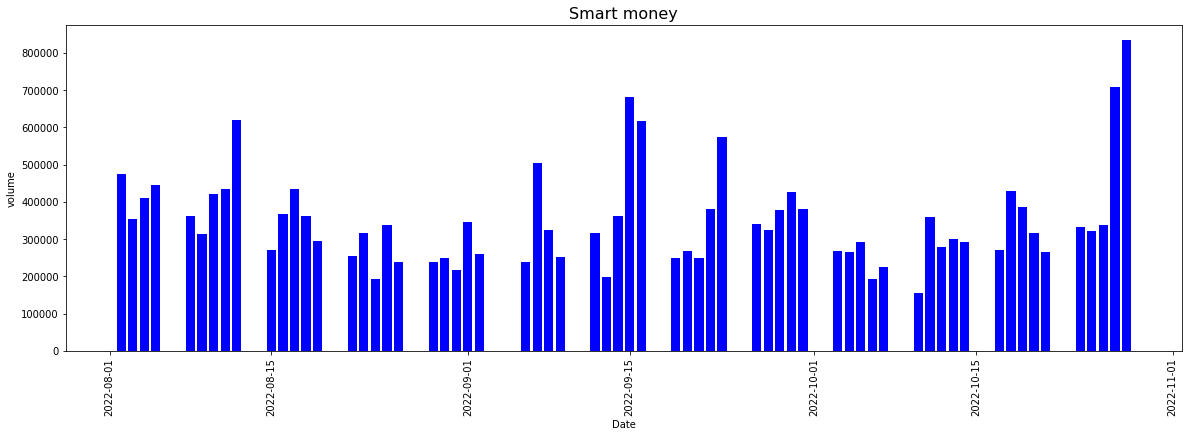

In [ ]:
fig, ax=plt.subplots(figsize=(20,6))

ax.bar(earnings_history_three_months.index, earnings_history_three_months['volume'], color='b')
ax.set_xlabel('Date')
ax.set_ylabel('volume')
ax.set_title('Smart money', fontsize=16)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

#QUARTERLY REPORT

AVERAGE VALUE OF THE COMPANY AFTER THE END OF THREE MONTH

In [ ]:
price_three_months_ago = earnings_history_three_months.open[0]
price_three_months_ago

191.3800048828125

In [ ]:
price_yesterday = earnings_history_three_months.open[-1] 
price_yesterday

202.0

In [ ]:
print(f"Average opening value: {earnings_history_three_months.open.mean():.2f}")  
print(f"Average daily value: {earnings_history_three_months.high.mean():.2f}") 
print(f"Average daily lowest value {earnings_history_three_months.low.mean():.2f}")
print(f"Average closing value: {earnings_history_three_months.close.mean():.2f}")
print(f"Percentage increase in the company's shares: {(price_yesterday-price_three_months_ago)/price_three_months_ago*100:.2f}" "%" )

Average opening value: 196.45
Average daily value: 200.77
Average daily lowest value 192.19
Average closing value: 196.78
Percentage increase in the company's shares: 5.55%


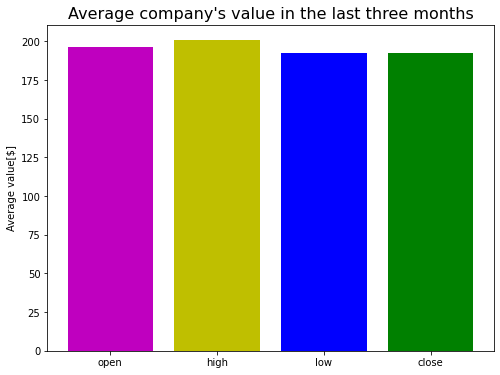

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))

ax.bar('open', earnings_history_three_months.open.mean(), color='m')   
ax.bar('high', earnings_history_three_months.high.mean(), color='y')  
ax.bar('low',  earnings_history_three_months.low.mean(), color='b')   
ax.bar('close', earnings_history_three_months.low.mean(), color='g')  

ax.set_ylabel('Average value[$]')
ax.set_ylim() 
ax.set_title("Average company's value in the last three months", fontsize=16)
plt.show()

**WE WILL SEE MORE WHAT THE PRICE IS SHAPING - AN IMAGE OF THE COMPANY'S PRICE DURING ONE MONTH**

In [ ]:
one_month_ago = today - timedelta(days=30)
one_month_ago = one_month_ago.isoformat()

In [ ]:
earnings_history_one_month = yh.get_data(name_max_day, one_month_ago , end_date, index_as_date = True)

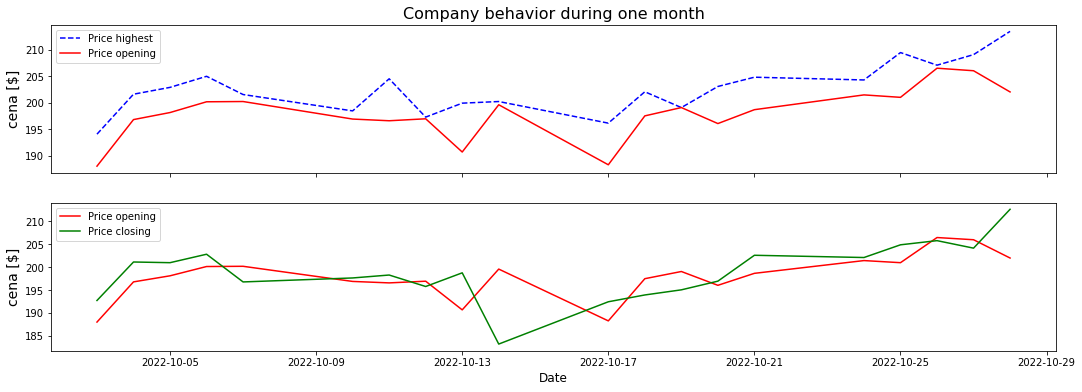

In [ ]:
fig, ax=plt.subplots(2,1,sharey=False, figsize=(18,6))

ax[0].plot(earnings_history_one_month.index, earnings_history_one_month['high'], color='b', linestyle='--')
ax[0].plot(earnings_history_one_month.index, earnings_history_one_month['open'], color='r')

ax[1].plot(earnings_history_one_month.index, earnings_history_one_month['open'], color='r')
ax[1].plot(earnings_history_one_month.index, earnings_history_one_month['close'], color='g', linestyle='-')

ax[1].set_xlabel('Date',fontsize=12)

ax[0].set_ylabel('cena [$]',fontsize=14)
ax[1].set_ylabel('cena [$]',fontsize=14)

ax[0].set_title('Company behavior during one month', fontsize=16)

ax[0].set_xticklabels([])
ax[1].xaxis.set_tick_params(rotation=0)

ax[0].legend(["Price highest", "Price opening"], loc ="upper left")
ax[1].legend(["Price opening", "Price closing"], loc ="upper left")
plt.show()



**AVERAGE VALUE OF THE COMPANY AFTER THE END OF THE MONTH**

In [ ]:
price_month_ego = earnings_history_one_month.open[0] 
price_month_ego

187.99000549316406

In [ ]:
price_yesterday = earnings_history_one_month.open[-1] 
price_yesterday

202.0

In [ ]:
print(f"Average opening value: {earnings_history_one_month.open.mean():.2f}")  
print(f"Average daily value: {earnings_history_one_month.high.mean():.2f}") 
print(f"Average daily lowest value {earnings_history_one_month.low.mean():.2f}")
print(f"Average closing value: {earnings_history_one_month.close.mean():.2f}")
print(f"Percentage increase in the company's shares: {(price_yesterday-price_month_ego)/price_month_ego*100:.2f}" "%" )

Average opening value: 198.01
Average daily value: 202.67
Average daily lowest value 193.48
Average closing value: 198.93
Percentage increase in the company's shares: 7.45%


# Exploratory Data Analysis

**Data Cleaning**

I will bring up a dataset

In [ ]:
earnings_history_to_date = yh.get_data(name_max_day, start_day , end_date, index_as_date = True) 
df=pd.DataFrame(earnings_history_to_date)
df

,open,high,low,close,adjclose,volume,ticker
2006-11-09,15.000000,15.000000,13.170000,13.310000,13.310000,246800,GTLS
2006-11-10,13.280000,13.640000,13.250000,13.600000,13.600000,52600,GTLS
2006-11-13,13.750000,14.210000,13.560000,13.630000,13.630000,186900,GTLS
2006-11-14,13.610000,14.950000,13.610000,14.890000,14.890000,134700,GTLS
2006-11-15,14.970000,15.360000,14.290000,15.240000,15.240000,167200,GTLS
...,...,...,...,...,...,...,...
2022-10-24,201.440002,204.259995,198.820007,202.110001,202.110001,331800,GTLS
2022-10-25,200.979996,209.429993,200.979996,204.889999,204.889999,320600,GTLS
2022-10-26,206.479996,207.050003,201.520004,205.800003,205.800003,338700,GTLS
2022-10-27,206.000000,209.039993,202.559998,204.160004,204.160004,707900,GTLS


I'll do open, high, low, close, adjclose prices - to two decimal places

In [ ]:
df = df.round({'open': 2, 'high': 2, 'low': 2, 'close': 2, 'adjclose': 2})
df

,open,high,low,close,adjclose,volume,ticker
2006-11-09,15.00,15.00,13.17,13.31,13.31,246800,GTLS
2006-11-10,13.28,13.64,13.25,13.60,13.60,52600,GTLS
2006-11-13,13.75,14.21,13.56,13.63,13.63,186900,GTLS
2006-11-14,13.61,14.95,13.61,14.89,14.89,134700,GTLS
2006-11-15,14.97,15.36,14.29,15.24,15.24,167200,GTLS
...,...,...,...,...,...,...,...
2022-10-24,201.44,204.26,198.82,202.11,202.11,331800,GTLS
2022-10-25,200.98,209.43,200.98,204.89,204.89,320600,GTLS
2022-10-26,206.48,207.05,201.52,205.80,205.80,338700,GTLS
2022-10-27,206.00,209.04,202.56,204.16,204.16,707900,GTLS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4020 entries, 2006-11-09 to 2022-10-28
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      4020 non-null   float64
 1   high      4020 non-null   float64
 2   low       4020 non-null   float64
 3   close     4020 non-null   float64
 4   adjclose  4020 non-null   float64
 5   volume    4020 non-null   int64  
 6   ticker    4020 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 251.2+ KB


In [ ]:
df.isnull().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

The dataset is doesn't have any null values.

Now, let's see if it contains any duplicated values or not.

In [ ]:
print('Number of duplicate values are:')
df.duplicated().sum()

Number of duplicate values are:


0

There are no duplicated values and neither null values. It means that the dataset is already cleaned.

In [ ]:
df.describe()

,open,high,low,close,adjclose,volume
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4.020000e+03
mean,60.440736,61.664331,59.190716,60.450184,60.450184,4.057901e+05
std,45.214629,46.099126,44.301286,45.243413,45.243413,3.088664e+05
min,5.210000,5.760000,5.170000,5.260000,5.260000,1.290000e+04
25%,27.217500,28.090000,26.347500,27.257500,27.257500,2.390000e+05
50%,47.105000,48.285000,45.925000,46.915000,46.915000,3.421500e+05
75%,74.812500,76.102500,73.792500,74.910000,74.910000,4.905250e+05
max,218.590000,218.950000,206.910000,212.660000,212.660000,7.218400e+06


I WILL GO NOW TO CREATE A MODEL THAT PROVIDES US THE PRICE OF THE COMPANY, WE WILL ANSWER THE QUESTION, IS IT WORTH INVESTING IN THIS COMPANY?

I will use **Linear Regression** to create the model.

I am interested in the dependence of the company's closing price on the volume (source of price changes)


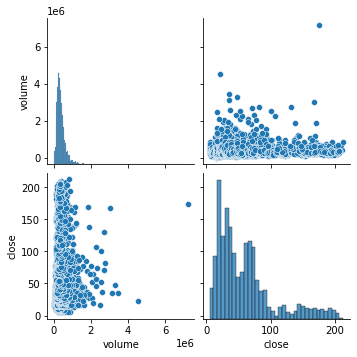

In [ ]:
sns.pairplot(pd.DataFrame(df, columns=[ 'volume', 'close']))
plt.show()

In [ ]:
X = df[['volume']].values      
y = df[['close']].values  

# Model Selection

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
len(X_train)

3216

In [ ]:
len(X_test)

804

# MODEL TRAIN 



In [ ]:
sc = StandardScaler()
X_sc = sc.fit_transform(X_train)

# Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_sc, y_train)

LinearRegression()

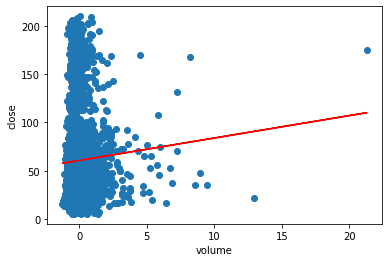

In [ ]:
fig, ax = plt.subplots()        
ax.scatter(X_sc, y_train) 
    
ax.plot(X_sc, lr.predict(X_sc), c='r')
plt.xlabel('volume')
plt.ylabel('close')
plt.show()

In [ ]:
lr.score(X_sc, y_train)

0.0026380816443731803

In [ ]:
lr.intercept_

array([60.59432214])

In [ ]:
lr.coef_

array([[2.32264511]])

# MODEL TEST

In [ ]:
X_test_sc = sc.transform(X_test)

In [ ]:
lr.score(X_test_sc, y_test)

0.005366637913616024

#PREDICT

**Estimated closing price**

In [ ]:
selected_day = df.sample(random_state=66)
selected_day

,open,high,low,close,adjclose,volume,ticker
2011-10-21,51.38,53.19,51.06,53.18,53.18,380800,GTLS


In [ ]:
to_predict = df[['volume']].sample(random_state=66)
to_predict

,volume
2011-10-21,380800


In [ ]:
data_to_predict_sc = sc.transform(to_predict) 
data_to_predict_sc

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



array([[-0.09440831]])

In [ ]:
price_close_predict = lr.predict(data_to_predict_sc) 
price_close_predict

array([[60.37504513]])

# Grid Search

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
params = {'n_estimators': [1,2, 3,5,7,8,9,10], 'max_depth': [2,3,4,5], 'min_samples_split': [5,10,15,20]}
gs = GridSearchCV(estimator=rfr, param_grid=params)

In [ ]:
gs.fit(X_train, y_train.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [1, 2, 3, 5, 7, 8, 9, 10]})

In [ ]:
gs.best_estimator_

RandomForestRegressor(max_depth=3, min_samples_split=5, n_estimators=10)

In [ ]:
gs.best_score_

0.04041432416047983

In [ ]:
print(f"{gs.score(X_train, y_train.ravel()):.2f}")
print(f"{gs.score(X_test, y_test.ravel()):.2f}")

0.06
0.04


#Collected training and testing results of the model

In [ ]:
print("Score on the: \n\n"
     f"Training Model - Linear Regression: {lr.score(X_sc, y_train):.2f}\n"
     f"Testing Model  - Linear Regression: {lr.score(X_test_sc, y_test):.2f}\n\n"  
     f"Training Model - Grid Search: {gs.score(X_train, y_train.ravel()):.2f}\n"
     f"Testing Model  - Grid Search: {gs.score(X_test, y_test.ravel()):.2f}\n\n") 

Score on the: 

Training Model - Linear Regression: 0.00
Testing Model  - Linear Regression: 0.01

Training Model - Grid Search: 0.06
Testing Model  - Grid Search: 0.04




#Let's see if the model predicted well.

In [ ]:
day = selected_day.index[0]
predict_day = day.isoformat()
predict_day

'2011-10-21T00:00:00'

In [ ]:
today = date.today()
end_date = today.isoformat()
end_date

'2022-10-31'

Company data from the selected date until today.

In [ ]:
data_set = yh.get_data(name_max_day,predict_day, end_date, index_as_date = True)
data_set

,open,high,low,close,adjclose,volume,ticker
2011-10-21,51.380001,53.189999,51.060001,53.180000,53.180000,380800,GTLS
2011-10-24,53.509998,56.119999,53.500000,55.490002,55.490002,387100,GTLS
2011-10-25,54.790001,55.209999,52.740002,53.090000,53.090000,289700,GTLS
2011-10-26,54.700001,57.119999,54.700001,56.310001,56.310001,1116000,GTLS
2011-10-27,59.320000,59.950001,50.669998,56.270000,56.270000,2259600,GTLS
...,...,...,...,...,...,...,...
2022-10-24,201.440002,204.259995,198.820007,202.110001,202.110001,331800,GTLS
2022-10-25,200.979996,209.429993,200.979996,204.889999,204.889999,320600,GTLS
2022-10-26,206.479996,207.050003,201.520004,205.800003,205.800003,338700,GTLS
2022-10-27,206.000000,209.039993,202.559998,204.160004,204.160004,707900,GTLS


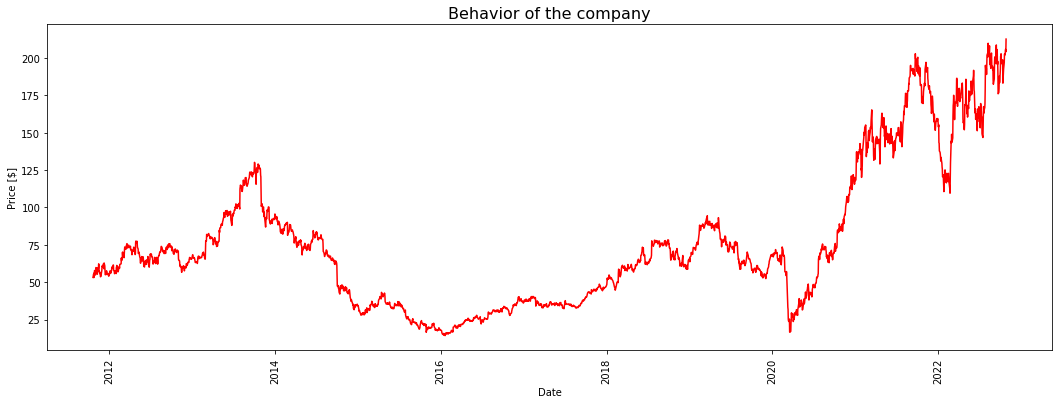

In [ ]:
fig, ax=plt.subplots(figsize=(18,6))  

ax.plot(data_set.index, data_set['close'], color='r')               

ax.set_xlabel('Date')
ax.set_ylabel('Price [$]')

ax.set_title('Behavior of the company', fontsize=16)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

**Conclusion:**


*   Percentage increase in the company's shares after three months: **5,55%**
*   Percentage increase in the company's shares after one month: **7,45%**


*   The model predicted an increase in the company's closing price.

**Would you invest in the above company - remember - the investment risk is associated with the inability to predict 100% what will happen with your investment in the future.**

**You will never invest without risk. A proven method of its reduction is the diversification of the portfolio held, which allows you to secure some of your funds. It is also worth acting in accordance with a well-thought-out investment strategy, the implementation of which will bring you closer to the overarching goal - profit.**


